In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

## Preprocessing Data

### Import data

In [2]:
df = pd.read_csv('../Data/PGH/DemandPrediction/ml_df.csv')
df.head(4)

,Unnamed: 0,total_households,median_hh_income,mean_hh_income,population_16yrs+,in_labor_force,civ_labor_force,employed,unemployed,perc_employed,...,wfh,mean_travel_time_to_work,perc_public,perc_alone,perc_walk,perc_other,2018_outflow,2019_outflow,2020_outflow,pred_outflow
0,0,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78
1,1,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78
2,2,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78
3,3,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78


In [3]:
df.columns

Index(['Unnamed: 0', 'total_households', 'median_hh_income', 'mean_hh_income',
       'population_16yrs+', 'in_labor_force', 'civ_labor_force', 'employed',
       'unemployed', 'perc_employed', 'perc_unemployed', 'Workers_16yrs+',
       'own_alone', 'carpool', 'public_transit', 'walked', 'other', 'wfh',
       'mean_travel_time_to_work', 'perc_public', 'perc_alone', 'perc_walk',
       'perc_other', '2018_outflow', '2019_outflow', '2020_outflow',
       'pred_outflow'],
      dtype='object')

## Remove Some Features

In [4]:
df = df.drop(columns=['Unnamed: 0', 'median_hh_income','mean_hh_income','in_labor_force', 'civ_labor_force', 
                      'employed','unemployed', 'perc_employed', 'perc_unemployed','own_alone', 
                      'carpool', 'public_transit', 'walked', 'other', 'wfh','mean_travel_time_to_work', 
                      'perc_public', 'perc_alone', 'perc_walk','perc_other', 'total_households', 'population_16yrs+', 'Workers_16yrs+'])

query_2018_mask = df['2018_outflow'] > 0
query_2019_mask = df['2019_outflow'] > 0
query_2020_mask = df['2020_outflow'] > 0
df = df[query_2018_mask | query_2019_mask | query_2020_mask ]
df.head(4)

,2018_outflow,2019_outflow,2020_outflow,pred_outflow
203,1,187,1776,654
224,2436,3926,6776,4379
225,2671,3015,2322,2669
226,618,611,728,652


In [5]:
df.fillna(0)

,2018_outflow,2019_outflow,2020_outflow,pred_outflow
203,1,187,1776,654
224,2436,3926,6776,4379
225,2671,3015,2322,2669
226,618,611,728,652
231,19,433,330,260
...,...,...,...,...
646,38,157,213,136
647,1,85,122,69
679,42,267,232,180
681,0,44,99,71


In [6]:
df['pred_outflow'].mean()

1136.1315789473683

In [7]:
df['pred_outflow'].max()

5187

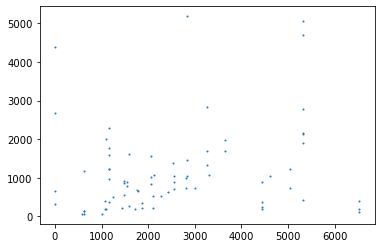

In [39]:
plt.scatter(df['population_16yrs+'], df['pred_outflow'], s=1); plt.show()

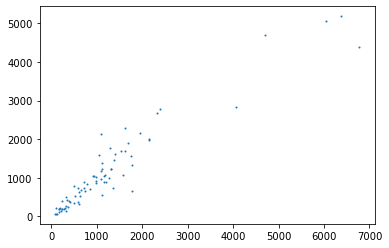

In [8]:
plt.scatter(df['2020_outflow'], df['pred_outflow'], s=1); plt.show()

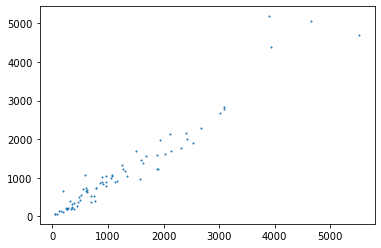

In [9]:
plt.scatter(df['2019_outflow'], df['pred_outflow'], s=1); plt.show()

In [10]:
df = df[df['pred_outflow']>0]
df.sample(7)

,2018_outflow,2019_outflow,2020_outflow,pred_outflow
444,1445,2418,2146,2003
679,42,267,232,180
644,7,113,312,144
563,10,957,1154,892
479,937,960,493,796
495,762,861,971,864
645,1144,1305,1087,1178


In [11]:
# df = df[(np.abs(stats.zscore(df)) > 0.5).all(axis=1)]
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df

### Split data for training and test

We have a small number of locations that have bike stations. First, we need to filter out any cell that does not have any stations.

In [12]:
X = df.iloc[:, 0:3].to_numpy()
y = df.iloc[:,3].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Perform Feature Scaling

## Defining Models

In [16]:
#Random Forest Classifier
rf_model = RandomForestRegressor(
    n_estimators=15,
    criterion='mae',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    max_leaf_nodes=None,
    bootstrap=True,
)

## Training our Random Forest Model

In [17]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 136.61449275362318
Mean Squared Error: 28171.222028985507
Root Mean Squared Error: 167.842849204205


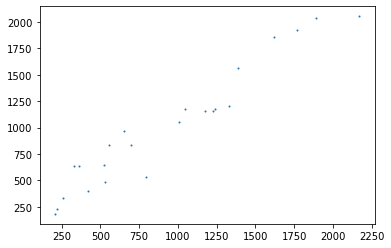

In [19]:
#given that we are predicting yearly demand, 170 bikes is not too bad.
plt.scatter(y_test, y_pred, s=1); plt.show()

In [22]:
import plotly.express as px

fig = px.scatter(df, y_test, y_pred, labels={'x':'ground truth', 
                          'y': 'predicted demand'},title="Random Forest")
fig.show()

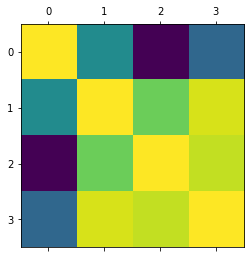

In [90]:
plt.matshow(df.corr())
plt.show()

In [58]:
X_train.shape

(300, 3)